# Legendre
Example of first few [Legendre Polynomials](https://en.wikipedia.org/wiki/Legendre_polynomials).

---

Create the canvas.

In [1]:
TCanvas canvas("DistCanvas", "Legendre polynomials example", 10, 10, 750, 600);
canvas.SetGrid();

Load the `MathMore` shared library (automatic loading of libraries does is not yet supported for functions).

In [2]:
gSystem->Load("libMathMore");

Create the set of Legendre functions.

In [3]:
const Int_t nFunc = 5;

std::vector<TF1> legendrePols;
legendrePols.reserve(5);
for (Int_t i = 0; i < nFunc; i++) {
    char label[10];
    sprintf(label, "L_{%d}(x)", i);    
    legendrePols.emplace_back(label, "ROOT::Math::legendre([0],x)", -1, 1);
    legendrePols[i].SetParameters(i, 0.0);
    legendrePols[i].SetLineStyle(1);
    legendrePols[i].SetLineWidth(2);
    legendrePols[i].SetLineColor(i+1);
}

legendrePols[0].SetMaximum(1.19);
legendrePols[0].SetMinimum(-1.19);
legendrePols[0].SetTitle("Legendre polynomials");

Create the legend and draw the functions.

In [4]:
TLegend leg(0.75, 0.13, 0.85, 0.33);
auto isFirst = true;
for (auto&& lPol : legendrePols) {    
    auto opt = isFirst ? "" : "same";
    isFirst = false;
    lPol.Draw(opt);
    leg.AddEntry(&lPol, lPol.GetName(), "l");
}
leg.Draw();

Draw the canvas.

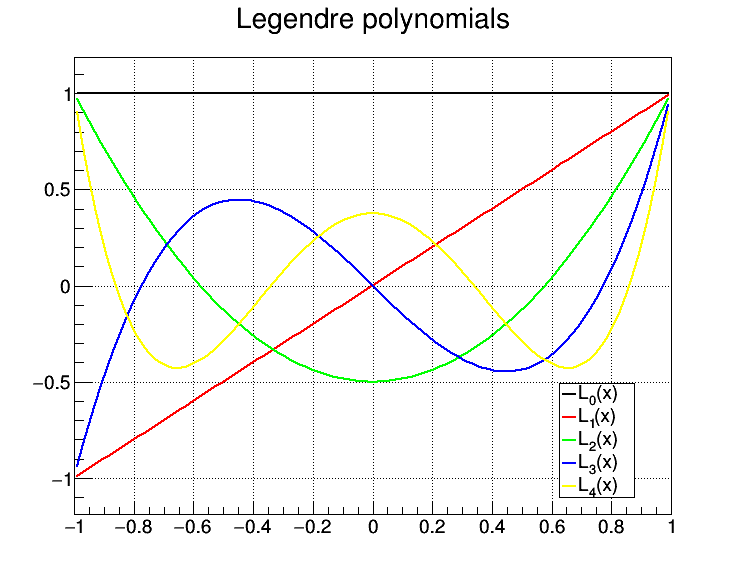

In [5]:
canvas.Draw()